In [19]:
#  for mathematical operations
import numpy as np
#  for dataframes operations
import pandas as pd
# foe data visulations
import seaborn as sns
import matplotlib.pyplot as plt  

In [20]:
# for background style
plt.style.use('fivethirtyeight')


In [21]:
data= pd.read_csv(r'C:\Users\Punit\Downloads\facebook.csv')

In [22]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [23]:
data.shape






(1143, 11)

In [25]:
# lets Analyze the campaigns
print('Number of unique ads:',data['ad_id'].nunique())
print('Number of unique campaign:',data['xyz_campaign_id'].nunique())
print('Number of unique facebook campaign:',data['fb_campaign_id'].nunique())
print('Number of interested groups:',data['interest'].nunique())
print('NUmber of unique age group;',data['age'].nunique())

Number of unique ads: 1143
Number of unique campaign: 3
Number of unique facebook campaign: 691
Number of interested groups: 40
NUmber of unique age group; 4


In [26]:
# as we can see that every ad is having an unique ID sow 

data= data.drop(['fb_campaign_id'],axis=1)


In [31]:
data=data.drop(['ad_id'],axis=1)

In [32]:
# lets check the columns in the data after droping  
data.columns

Index(['xyz_campaign_id', 'age', 'gender', 'interest', 'Impressions', 'Clicks',
       'Spent', 'Total_Conversion', 'Approved_Conversion'],
      dtype='object')

In [33]:
# lets check the nulll values in the data
data.isnull().sum()


xyz_campaign_id        0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [35]:
#  we can see that there are omly three campaign run by the company 
# lets check more details about the company
data['xyz_campaign_id'].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [38]:
# lets replace the name of these campaign
data['xyz_campaign_id']=data['xyz_campaign_id'].replace((1178,936,916),('campaign_c','campaign_b','campaign_a'))

# lets check the campaign name again
data['xyz_campaign_id'].value_counts()


campaign_c    625
campaign_b    464
campaign_a     54
Name: xyz_campaign_id, dtype: int64

In [41]:
# lets compare the converstion ,Expense and visibility amoun the Campaigns
data[['xyz_campaign_id','Impressions','Spent','Approved_Conversion']].groupby(['xyz_campaign_id'],as_index = False).agg('mean').rename(columns={'xyz_campaign_id': 'campaign','Approved_Conversion':'Average Conversion','Spent': 'Average Expense','Impressions':'Average Visibility'}).style.background_gradient(cmap='Wistia')

,campaign,Average Visibility,Average Expense,Average Conversion
0,campaign_a,8943.055556,2.772407,0.444444
1,campaign_b,17517.644397,6.235711,0.394397
2,campaign_c,327717.945600,89.059440,1.395200


In [49]:
# Performing Feature Engineering to undersatnd the campaign in detail
# lets create a column to understand CTR
data['Click_Through_Rate']=((data['Clicks']/data["Impressions"])*100)

# Lets create a column to understand Conversion Rate
data['CostPerClick']=((data['Spent']/data['Clicks'])*100)

# lets create a column to understand converstuion rate

data['ConverstionRate']=((data['Approved_Conversion']/data['Total_Conversion'])*100)

# lets create a column to understand the cost per converstion
data['CostPerConverstion']=((data['Spent']/data['Approved_Conversion'])*100)

In [50]:
# lets add some more Features to undersatnd the return on investment also kmow as ROAS(return on AD Spend )
# lets calculate the converstion value,lets Assume that the value of sales if 100 dolars
data['ConverstionValue']= data['Approved_Conversion']*100

# lets calculte the ROAS which is the target value for us 
data['ROAS']=round((data['ConverstionValue']/data['Spent']))
#
# lets calculate CPM to understand the Brand AWarness from campaigns
data['CostPerMile']=round((data['Spent']/data['Impressions'])*1000,2)

In [51]:
# lets remove all the recods where we have any nan values of infinitty values

data= data.replace([np.inf,-np.inf],np.nan).dropna(axis = 0)

# lets check the shape of the data after revoming all the unnecessary records
print('Shape of the data after removing all the unnecessary data',data.shape)

Shape of the data after removing all the unnecessary data (513, 17)


In [55]:
# lets compare the campaign based on the new features created 
data[['xyz_campaign_id','Click_Through_Rate','ConversionRate','CostPerClick','ConverstionValue','ROAS','CostPerMile']].groupby(['xyz_campaign_id'], as_index = False).agg("mean").rename(columns={'Click_Through_Rate':'Average CTR','xyz_campaign_id':'Campaign','CostPerClick':'Average Cost/Click','ConversionRate':'Average ConverstionRate'}).style.background_gradient(cmap='Wistia')

,Campaign,Average CTR,Average ConverstionRate,Average Cost/Click,ConverstionValue,ROAS,CostPerMile
0,campaign_a,0.027162,133.946428,133.946428,100.000000,42.625000,0.371250
1,campaign_b,0.026293,137.292801,137.292801,105.357143,47.008929,0.359732
2,campaign_c,0.016359,158.342521,158.342521,225.714286,5.231169,0.254000


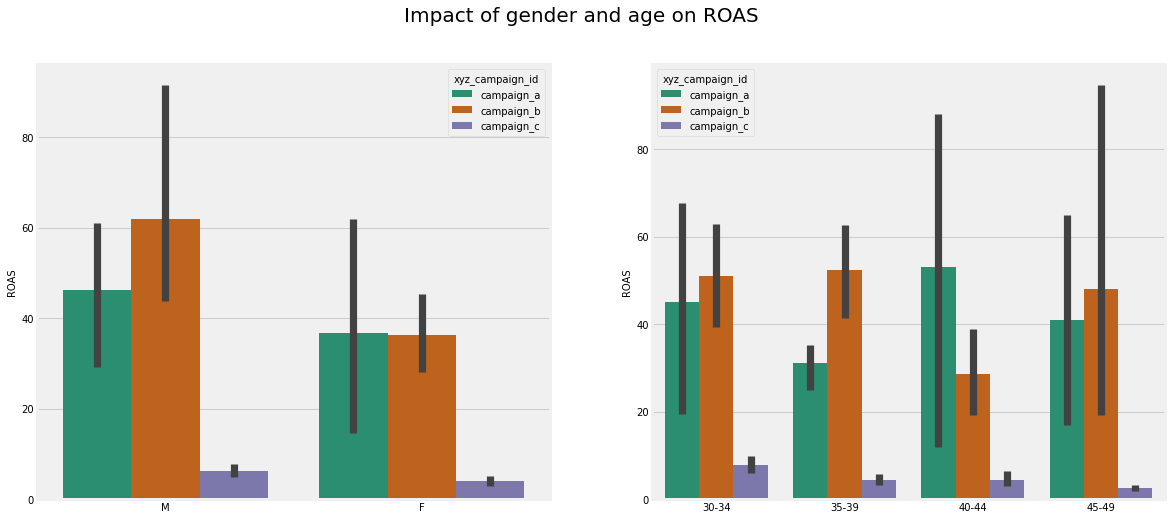

In [66]:
# lets Compare Campaign with respect to different Groups
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,2,1)
sns.barplot(x =  data['gender'],y = data['ROAS'],hue =data['xyz_campaign_id'],palette ='Dark2')
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(x=data['age'],y =data['ROAS'],
           hue = data['xyz_campaign_id'],
            palette='Dark2')
plt.xlabel('')

plt.suptitle('Impact of gender and age on ROAS',fontsize = 20)
plt.show()


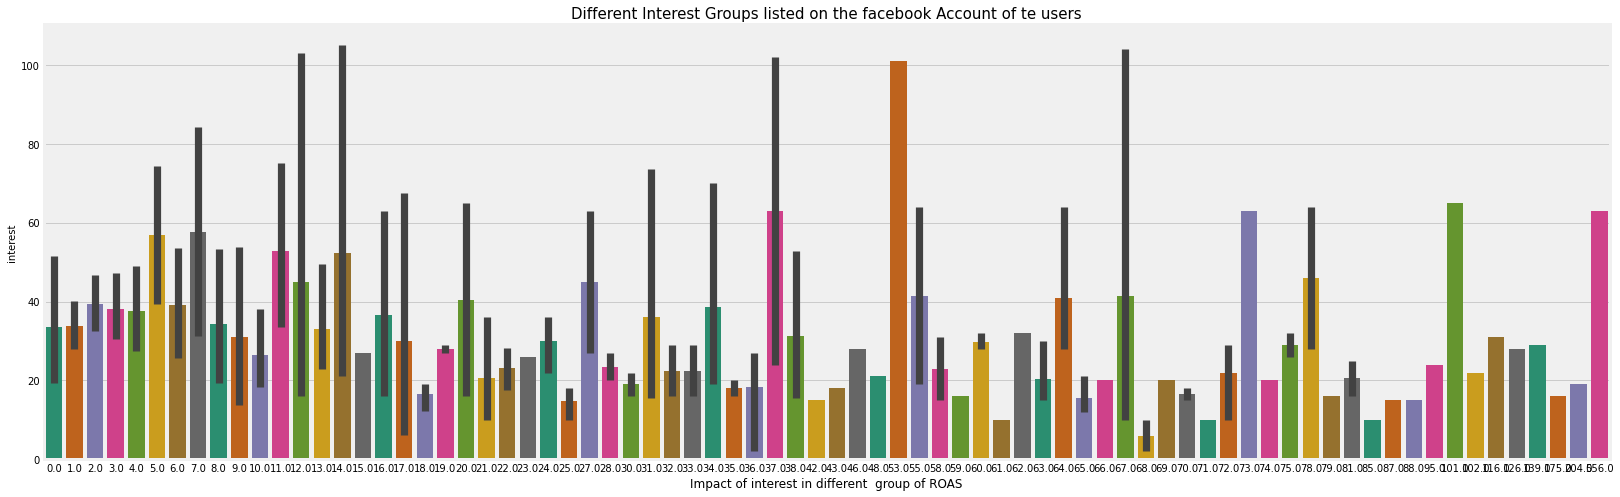

In [76]:
plt.rcParams['figure.figsize']=(25,8)
sns.barplot(x= data['ROAS'],y = data['interest'],palette= 'Dark2')
plt.xlabel('Impact of interest in different  group of ROAS',fontsize= 12)
plt.title('Different Interest Groups listed on the facebook Account of te users',fontsize = 15)
plt.show()
# plt.xticks(rotation = "verticel")
            

In [78]:
# lets find out the intyerset groups which have the highest ROas
data[['interest','ROAS']].sort_values(by = 'ROAS',ascending = False).head(5).style.background_gradient(cmap = 'cool')

,interest,ROAS
267,63,556.000000
215,19,204.000000
244,16,175.000000
318,29,139.000000
484,28,126.000000


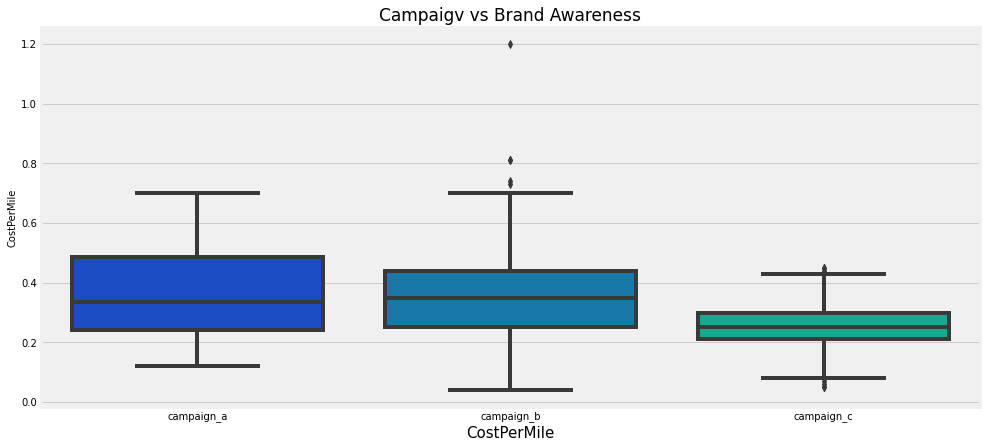

In [86]:
plt.rcParams['figure.figsize']= (15,7)
sns.boxplot (x= data['xyz_campaign_id'], y= data['CostPerMile'],palette= 'winter')
plt.xlabel('CostPerMile',fontsize= 15)
plt.title('Campaigv vs Brand Awareness',fontsize= 17)
plt.show()

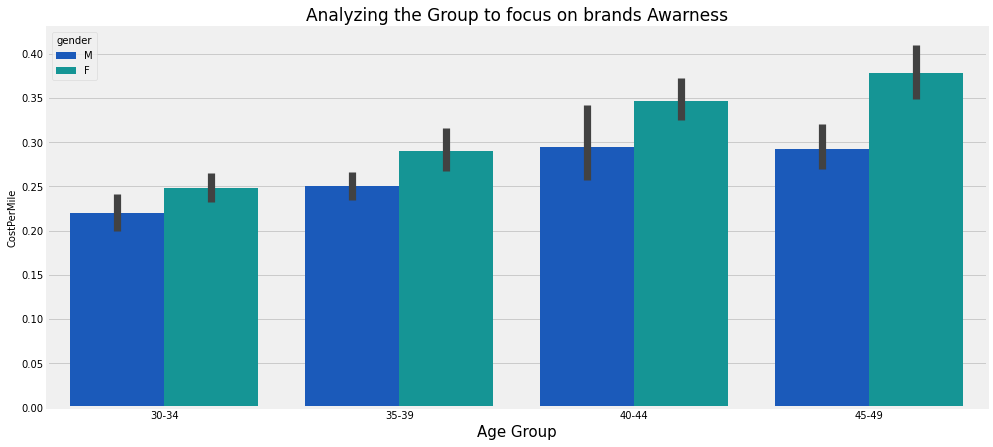

In [89]:
plt.rcParams['figure.figsize']= (15,7)
sns.barplot (x= data['age'], y= data['CostPerMile'], hue = data['gender'],palette= 'winter')
plt.xlabel('Age Group',fontsize= 15)
plt.title('Analyzing the Group to focus on brands Awarness',fontsize= 17)
plt.show()

In [94]:
plt.rcParams['figure.figsize']=(15,8)
sns.scatterplot(y= data['Impressions'],x= ['Click'],color = 'black')
plt.title('Relationship between Clicks and Impression ',fontsize= 12)
plt.show()


ValueError: array length 1 does not match index length 513

In [100]:
# lets Categories the clicks and check the impact on impressons
# lets create a function to categories the clicks column



In [120]:
def cat(x):
   
    if x <= 100:
        return '0-100'
    elif x <= 200:
        return '100-200'
    elif x <= 300:
        return '200-300'
    else :
        return '300+'
    
# lets apply the function on click 
# data['Clicks']= data['Clicks'].apply(cat) 

# lets understand the impact of impression on clicks 
data[['Impressions','Clicks' ]].groupby('Clicks').agg(['mean']).style.background_gradient(cmap='Wistia')


,Impressions
,mean
Clicks,
0-100,163307.390777
100-200,800683.319444
200-300,1203176.360000
300+,2229958.250000


In [119]:
data.head()

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Click_Through_Rate,ConversionRate,ConverstionRate,CostPerConverstion,ConverstionValue,ROAS,CostPerMile,CostPerClick
0,campaign_a,30-34,M,15,7350,0-100,1.43,2,1,0.013605,142.999995,50.0,142.999995,100,70.0,0.19,142.999995
4,campaign_a,30-34,M,28,4133,0-100,1.29,1,1,0.024195,128.999996,100.0,128.999996,100,78.0,0.31,128.999996
7,campaign_a,30-34,M,16,10951,0-100,1.27,1,1,0.009132,126.999998,100.0,126.999998,100,79.0,0.12,126.999998
14,campaign_a,30-34,M,20,14669,0-100,10.28,1,1,0.047720,146.857146,100.0,1028.000021,100,10.0,0.70,146.857146
19,campaign_a,35-39,M,16,21026,0-100,4.63,2,1,0.019024,115.750003,50.0,463.000011,100,22.0,0.22,115.750003
